In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from urllib.request import urlopen
from sodapy import Socrata

In [2]:
def load_colombia_df():
    client = Socrata("www.datos.gov.co", None)  # https://www.datos.gov.co/es/profile/edit/developer_settings   por si no funciona
    results = client.get("gt2j-8ykr", limit=1000000)
    results_df = pd.DataFrame.from_records(results)
    return results_df

In [3]:
df = load_colombia_df()

In [4]:
df

,id_de_caso,fecha_de_notificaci_n,c_digo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,...,fis,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_de_muerte
0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,...,2020-02-27T00:00:00.000,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,PCR,11,380,Otro,NaN,NaN
1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,...,2020-03-04T00:00:00.000,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,PCR,76,724,Otro,NaN,NaN
2,3,2020-03-07T00:00:00.000,05001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,...,2020-02-29T00:00:00.000,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,PCR,5,724,Otro,NaN,NaN
3,4,2020-03-09T00:00:00.000,05001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,...,2020-03-06T00:00:00.000,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN,NaN
4,5,2020-03-09T00:00:00.000,05001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,...,2020-03-08T00:00:00.000,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182135,182176,2020-06-28T00:00:00.000,70001,Sincelejo,Sucre,Casa,70,M,En estudio,Leve,...,2020-06-25T00:00:00.000,2020-07-09T00:00:00.000,NaN,2020-07-17T00:00:00.000,NaN,70,NaN,NaN,NaN,NaN
182136,182177,2020-06-29T00:00:00.000,70001,Sincelejo,Sucre,Casa,5,M,En estudio,Leve,...,2020-06-26T00:00:00.000,2020-07-10T00:00:00.000,NaN,2020-07-17T00:00:00.000,NaN,70,NaN,NaN,NaN,NaN
182137,182178,2020-06-29T00:00:00.000,70001,Sincelejo,Sucre,Casa,42,F,En estudio,Leve,...,2020-06-26T00:00:00.000,2020-07-10T00:00:00.000,NaN,2020-07-17T00:00:00.000,NaN,70,NaN,NaN,NaN,NaN
182138,182179,2020-06-29T00:00:00.000,05001,Medellín,Antioquia,Casa,29,M,En estudio,Leve,...,2020-06-25T00:00:00.000,2020-07-10T00:00:00.000,NaN,2020-07-17T00:00:00.000,NaN,5,NaN,NaN,NaN,NaN


In [5]:
df["fecha_diagnostico"] = pd.to_datetime(df["fecha_diagnostico"], errors="coerce")
df["fecha_reporte_web"] = pd.to_datetime(df["fecha_reporte_web"], errors="coerce")
df["fecha_recuperado"] = pd.to_datetime(df["fecha_recuperado"], errors="coerce")

df["fis"] = pd.to_datetime(df["fis"], errors="coerce")
df["retraso"] = (df["fecha_reporte_web"] - df["fis"]).dt.days
df["duracion"] = (df["fecha_recuperado"] - df["fis"]).dt.days

In [6]:
df["duracion"].mean()

30.410444557722748

In [7]:
retraso_df = df.groupby("fecha_reporte_web")["retraso"].mean().to_frame().reset_index()

In [8]:
retraso_df

,fecha_reporte_web,retraso
0,2020-03-06,8.000000
1,2020-03-09,7.000000
2,2020-03-11,5.166667
3,2020-03-12,5.200000
4,2020-03-13,3.800000
...,...,...
126,2020-07-13,13.663978
127,2020-07-14,12.579058
128,2020-07-15,12.392456
129,2020-07-16,14.262087


/home/davinchi/Documents/Projects/instatrooper/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


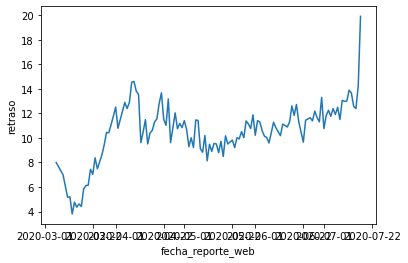

In [32]:
sns.lineplot(x = "fecha_reporte_web", y = "retraso", data = retraso_df)

In [29]:
df.loc[:,["fecha_diagnostico", "fecha_reporte_web"]]

,fecha_diagnostico,fecha_reporte_web
0,2020-03-06,2020-03-06
1,2020-03-09,2020-03-09
2,2020-03-09,2020-03-09
3,2020-03-11,2020-03-11
4,2020-03-11,2020-03-11
...,...,...
182135,2020-07-09,2020-07-17
182136,2020-07-10,2020-07-17
182137,2020-07-10,2020-07-17
182138,2020-07-10,2020-07-17


In [30]:
nuevos = df[df["fecha_reporte_web"] == "2020-07-17T00:00:00.000"]
demora_col = ((nuevos["fecha_reporte_web"] - nuevos["fis"]).dt.days).mean()

print(f"casos Colombia:{nuevos.shape}, demora: {demora_col}")

divs = {"11001": "Bogota", 
        "08001": "Barranquilla", 
        "05001": "Medellin"}
for div in divs:
    nuevos_place = nuevos[nuevos["c_digo_divipola"] == div]
    demora_place = ((nuevos_place["fecha_reporte_web"] - nuevos_place["fis"]).dt.days).mean()
    print(f"casos {divs[div]}:{nuevos_place.shape}, demora: {demora_place}")

casos Colombia:(8934, 23), demora: 19.913937453829107
casos Bogota:(2101, 23), demora: 12.12452543659833
casos Barranquilla:(2106, 23), demora: 25.33365155131265
casos Medellin:(605, 23), demora: 19.70413223140496


(8934, 23)

19.913937453829107

In [13]:
nuevos_barr = nuevos[nuevos["c_digo_divipola"] == "08001"]

In [14]:
nuevos_barr.shape

(2106, 23)

25.33365155131265

In [16]:
nuevos_ant = nuevos[nuevos["departamento"] == "Antioquia"]

In [19]:
nuevos_ant.shape

(1053, 23)

In [17]:
((nuevos_ant["fecha_reporte_web"] - nuevos_ant["fis"]).dt.days).mean()

18.193732193732195